# Position of a quasar

The position of a quasar could be estimated through instruments as GAIA. The measurement, however, is not free from errors. 

In the first case we suppose to have measurements of the position of a quasar with homoscedastic uncertainties to simulate for example the case in which the error of the instrument we are using is the main one. 

### Gaussians with homoscedastic errors

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Our hypothesis is that the values of the position of a quasar are distributed as a gaussian with mean $\mu = 1$ and $\sigma = 0.2$, in suitable units.

Text(0.5, 0, '$\\mu$')

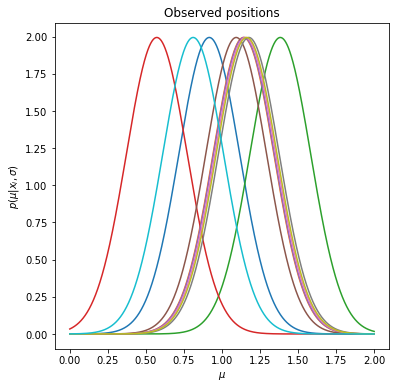

In [52]:
gauss = norm(loc=1, scale=0.2)   #gaussian from which I extract the observed values  
N_obs = 10                       #number of observations
np.random.seed(29)
x = gauss.rvs(N_obs)             #values of the observations

x_axis = np.linspace(0,2, 10000) 

L = 1     #Likelihood function (initialised to 1 since I have to multiply stuff here)
ln_L = 0  #log_Likelihood function (initialised to 0 since I have to sum stuff here)

fig, ax = plt.subplots(1,1,figsize=(6,6))

for i in range(N_obs):
    gauss_measure = norm(loc = x[i], scale = 0.2) #in this vector I store the single gaussians with mean = extracted points 
                                                  #and sigma = 0.2
    plt.plot(x_axis, gauss_measure.pdf(x_axis))
    
    L = L*gauss_measure.pdf(x_axis)
    ln_L += gauss_measure.logpdf(x_axis)

ax.set_title('Observed positions')
ax.set_ylabel('$p(\mu|x_{i}, \sigma)$')
ax.set_xlabel('$\mu$')

The maximum of the Likelihood is found at: 1.05511


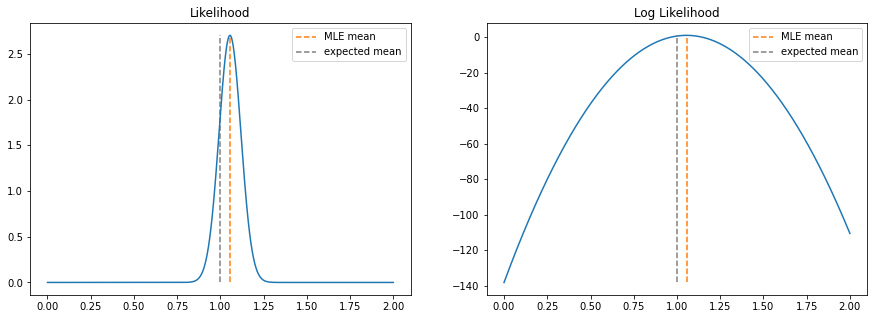

In [53]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(x_axis, L)
ax[1].plot(x_axis, ln_L)

#finding the maximum of the Likelihood function
ind_max = np.argsort(L)[-1]
max_L = x_axis[ind_max]
print('The maximum of the Likelihood is found at: %.5f' %(max_L))

ax[0].set_title('Likelihood')
ax[0].vlines(x=max_L, ymin = np.min(L), ymax = L[ind_max], ls='--', color = 'tab:orange', label = 'MLE mean')
ax[0].vlines(x=1, ymin = np.min(L), ymax = L[ind_max], ls='--', color= 'gray', label='expected mean')
ax[0].legend()

ax[1].set_title('Log Likelihood')
ax[1].vlines(x=max_L, ymin = np.min(ln_L), ymax = ln_L[ind_max], ls='--', color = 'tab:orange', label = 'MLE mean')
ax[1].vlines(x=1, ymin = np.min(ln_L), ymax = ln_L[ind_max], ls='--', color= 'gray', label='expected mean')
ax[1].legend()

We can compare the computed mean with the one we can find from the analytical formula. In fact, by maximising the likelihood given by the product of Gaussians with equal $\sigma$. What one gets is the well-known formula:

$$\hat{\mu} = \frac{1}{N}\sum_{i = 1}^{N}{x_{i}}$$

In [54]:
#evaluating the mean of the sample to compare it with the MLE e"empirical" estimator
mean_estimator = np.mean(x)
print('The mean of the sample is: %.5f' %mean_estimator)

The mean of the sample is: 1.05518


To evaluate the dispersion of the sample from the likelihood one can use the following formulae:

$$\sigma_{\mu} = \left( - \frac{d^2\ln L(\mu)}{d\mu^2}\Biggr\rvert_{\hat \mu}\right)^{-1/2}$$

That once applied analytically to a set of Gaussian distributions with homoscedastic errors gives:

$$\frac{d^2\ln L(\mu)}{d\mu^2}\Biggr\rvert_{\hat \mu} = - \sum_{i=1}^N\frac{1}{\sigma^2} = -\frac{N}{\sigma^2},$$

And therefore:

$$\sigma_{\mu} = \frac{\sigma}{\sqrt{N}}.$$

In [55]:
#evaluating sigma from the Likelihood

width = (x_axis[1:] - x_axis[:-1])[0]     #dx between each point of the x-grid
second_der = np.diff(ln_L, n=2)/width**2  #second derivative of the log_L

err = (-1*second_der[ind_max-1])**(-0.5) #sigma estimated from the likelihood
print('The error on the mean as estimated from the Likelihood is: %.5f' %err)

The error on the mean as estimated from the Likelihood is: 0.06325


In [56]:
#sigma analytically evaluated from theory
sigma_est = 0.2/np.sqrt(N_obs)
print('The error on the mean evaluated analitically: %.5f' %sigma_est)

The error on the mean evaluated analitically: 0.06325


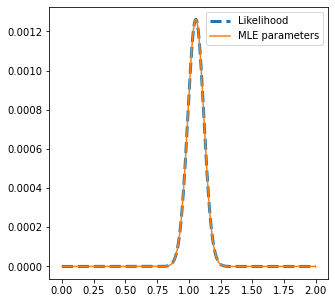

In [57]:
#comparing the likelihood with the resulting MLE distribution
fig, ax = plt.subplots(1,1, figsize=(5,5))

resulting_g = norm.pdf(x_axis, loc=max_L, scale = mean_err) #gaussian generated from MLE parameters

#plotting normalising the curves dividing by the sum of the function vector
ax.plot(x_axis, L/np.sum(L), lw=3, label='Likelihood', ls='--')  
ax.plot(x_axis, resulting_g/np.sum(resulting_g), label='MLE parameters')
ax.legend()

The mean found numerically from MLE parameters and the one found analitically from the inital sample are the same at least considering the first 5 significant digits. The same happens also with the error.

The estimated mean, however, is different from the expected value of $\mu = 1$ since we have only 10 sample data, but iif we increase this number we expect the mean to be closer to unity.

### Gaussians with heterostedastic errors

What if we have different errors? Maybe we were observing the quasar from Earth with different seeing conditions and our measurments could all have different uncertainties.

Let's suppose that the errors are distributed as a Gaussian with $\mu = 0.2$ and $\sigma = 0.05$.

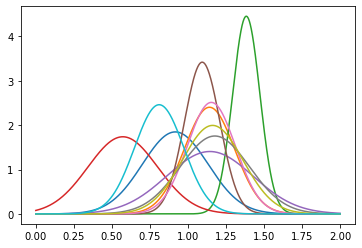

In [58]:
gauss_err = norm(loc=0.2, scale=0.05) #gaussian for uncertainties extraction
np.random.seed(72)
sigma = gauss_err.rvs(N_obs)          #errors for the observation

L_h = 1     #Likelihood
ln_L_h = 0  #log Likelihood

for i in range(N_obs):
    gauss_measure = norm(loc = x[i], scale = sigma[i])
    plt.plot(x_axis, gauss_measure.pdf(x_axis))
    L_h = L_h *gauss_measure.pdf(x_axis)
    ln_L_h += gauss_measure.logpdf(x_axis)

The mean found by maximising the Likelihood function is: 1.14151


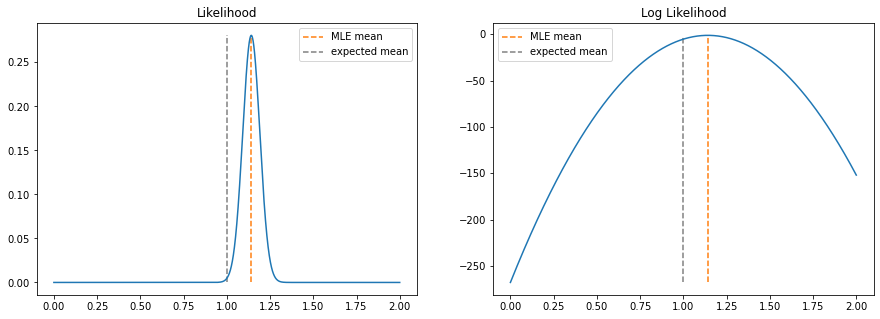

In [59]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

#maximising the Likelihood
ind_max_h = np.argsort(L_h)[-1]
max_L_h = x_axis[ind_max_h]
print('The mean found by maximising the Likelihood function is: %.5f' %max_L_h)

ax[0].plot(x_axis, L_h)
ax[0].set_title('Likelihood')
ax[0].vlines(x=max_L_h, ymin = np.min(L_h), ymax = L_h[ind_max_h], ls='--', color = 'tab:orange', label = 'MLE mean')
ax[0].vlines(x=1, ymin = np.min(L_h), ymax = L_h[ind_max_h], ls='--', color= 'gray', label='expected mean')
ax[0].legend()

ax[1].plot(x_axis, ln_L_h)
ax[1].set_title('Log Likelihood')
ax[1].vlines(x=max_L_h, ymin = np.min(ln_L_h), ymax = ln_L_h[ind_max], ls='--', color = 'tab:orange', label = 'MLE mean')
ax[1].vlines(x=1, ymin = np.min(ln_L_h), ymax = ln_L_h[ind_max], ls='--', color= 'gray', label='expected mean')
ax[1].legend()

Here again we could compare the mean and the dispersion values found from the computed Likelihood function with the ones found analytically from the maximisation of a Likelihood coming from a set of hetherostedastic normal distributions.

Analytically we find:

$$\hat \mu = \frac{\sum_{i=1}^N (x_i/\sigma_i^2)}{\sum_{i=1}^N (1/\sigma_i^2)}$$

$$\sigma_{\mu} = \left( \sum_{i=1}^N \frac{1}{\sigma_i^2}\right)^{-1/2}$$

In [60]:
#mean computed from the analytical formula
mean_h = np.sum(x/sigma**2)/np.sum(1/sigma**2) #weighted mean
print('The mean computed from the analytical formula is: %.5f' %mean_h)
print('The mean numerically computed is: %.5f' %max_L_h)

The mean computed from the analytical formula is: 1.14157
The mean numerically computed is: 1.14151


In [63]:
#evaluating the dispersion from the analytical formula
sigma_est = np.sum(1/sigma**2)**(-0.5)
print('The error analytically estimated is: %.5f' %mean_err_h)

The error analytically estimated is: 0.04943


In [62]:
#evaluating the error on the mean from the computed Likelihood

second_der_h = np.diff(ln_L_h, n=2)/width**2  #second derivative of the log_L

mean_err_h = (-1*second_der_h[ind_max_h-1])**(-0.5) #error on the mean estimated from the likelihood
print('The error as estimated from the computed Likelihood is: %.5f' %mean_err_h)

The error as estimated from the computed Likelihood is: 0.04943
